In [1]:
import sys
sys.path.append("../")
import warnings
warnings.filterwarnings("ignore")

from eddies_detection import  get_traj_with_parcels, get_traj_with_numpy, find_eddies
from eddies_tracking import eddies_tracker
from catalog import write_catalog
from plot import StreamPlot
from time import time
import numpy as np

d0 = 0
date_len = 50
stream_data_fname = "../data/data.nc"
runtime = 600
delta_time = 5
particle_grid_step = 2

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 20]

## Compute the list of path

In [3]:
list_days = []

for di in range(date_len):
    print(di)
    t0 = time()
    b = get_traj_with_numpy(d0+di, runtime, delta_time, particle_grid_step, stream_data_fname)
    print("Time : ",time()-t0)
    
    bb = find_eddies(b)
    list_days.append(bb)

0
Integration: 5% 10% 15% 20% 25% 30% 35% 40% 45% 50% 55% 60% 65% 70% 75% 80% 85% 90% 95% 
Time :  49.77385854721069
1
Integration: 5% 10% 15% 20% 25% 30% 35% 40% 45% 50% 55% 60% 65% 70% 75% 80% 85% 90% 95% 
Time :  49.99514675140381
2
Integration: 5% 10% 15% 20% 25% 30% 35% 40% 45% 50% 55% 60% 65% 70% 75% 80% 85% 90% 95% 
Time :  48.597238302230835
3
Integration: 5% 10% 15% 20% 25% 30% 35% 40% 45% 50% 55% 60% 65% 70% 75% 80% 85% 90% 95% 
Time :  49.29870939254761
4
Integration: 5% 10% 15% 20% 25% 30% 35% 40% 45% 50% 55% 60% 65% 70% 75% 80% 85% 90% 95% 
Time :  50.55506682395935
5
Integration: 5% 10% 15% 20% 25% 30% 35% 40% 45% 50% 55% 60% 65% 70% 75% 80% 85% 90% 95% 
Time :  50.42607307434082
6
Integration: 5% 10% 15% 20% 25% 30% 35% 40% 45% 50% 55% 60% 65% 70% 75% 80% 85% 90% 95% 
Time :  50.010191440582275
7
Integration: 5% 10% 15% 20% 25% 30% 35% 40% 45% 50% 55% 60% 65% 70% 75% 80% 85% 90% 95% 
Time :  49.27841806411743
8
Integration: 5% 10% 15% 20% 25% 30% 35% 40% 45% 50% 55% 60% 

In [4]:
import random as rd

rd_color = lambda: '#{:02x}{:02x}{:02x}'.format(rd.randint(0,255),rd.randint(0,255),rd.randint(0,255))

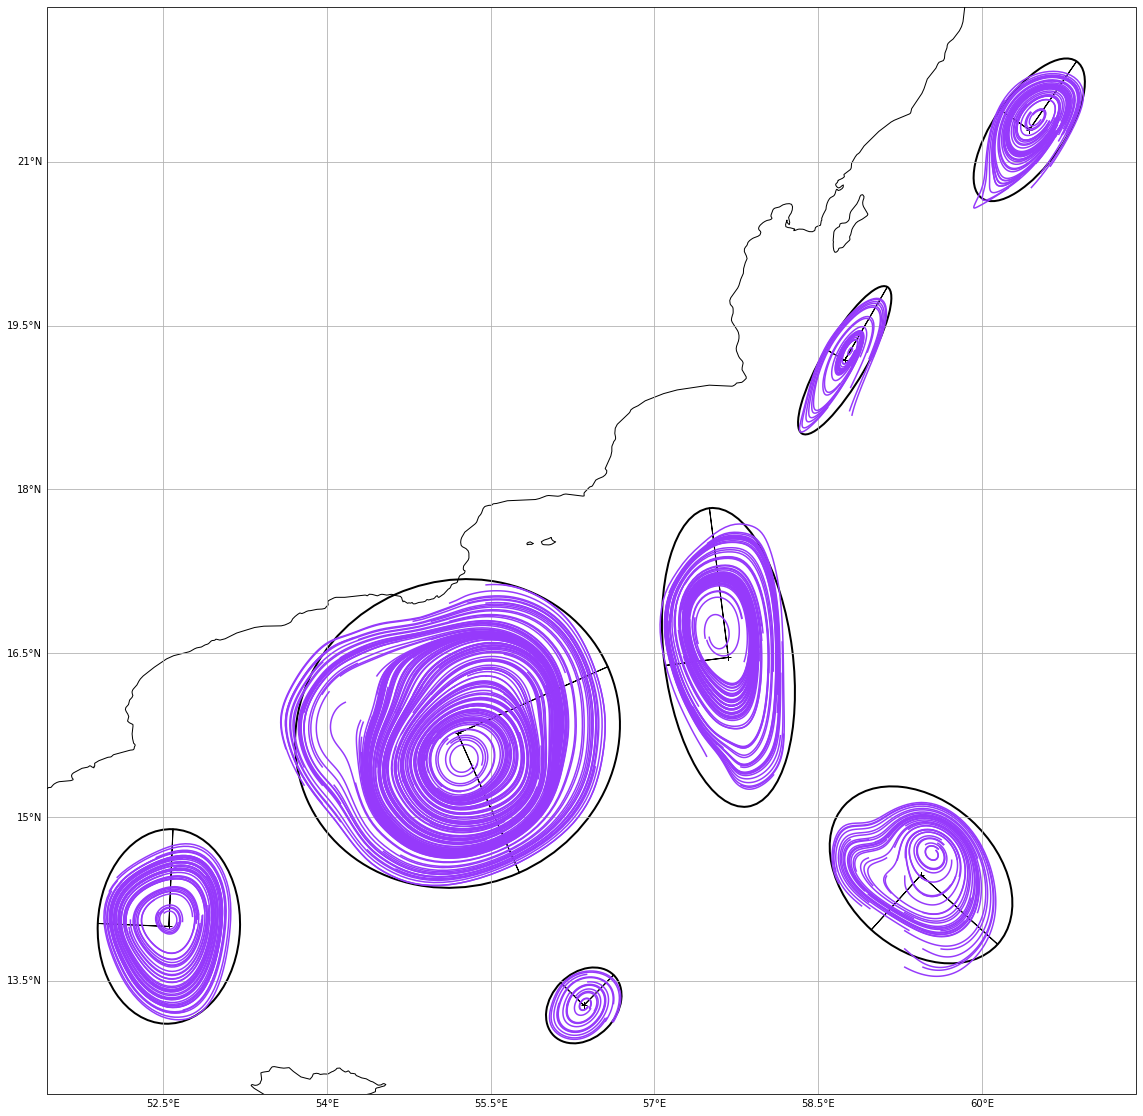

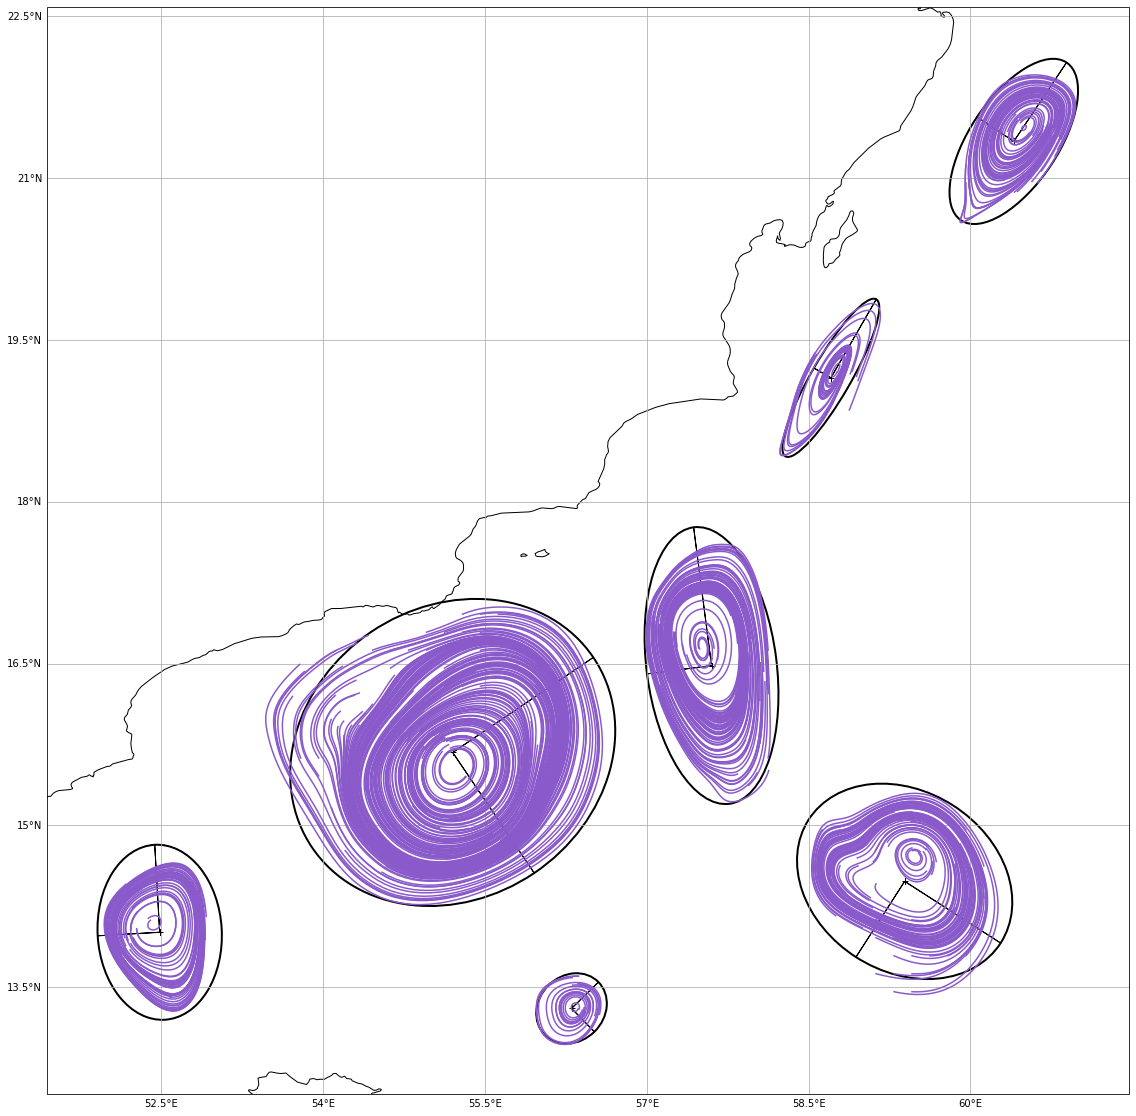

In [5]:
for bb in list_days[:2]:
    figure = StreamPlot()
    line_style = rd_color()
    figure.plot_eddies(bb,line_style=line_style)
    figure.show()

## Clustering

In [6]:
date_len = date_len
t0 = time()
paths = eddies_tracker(0,list_days[:date_len],nb_prev_day=8)
print("Time : ",time()-t0)

Time :  115.23864650726318


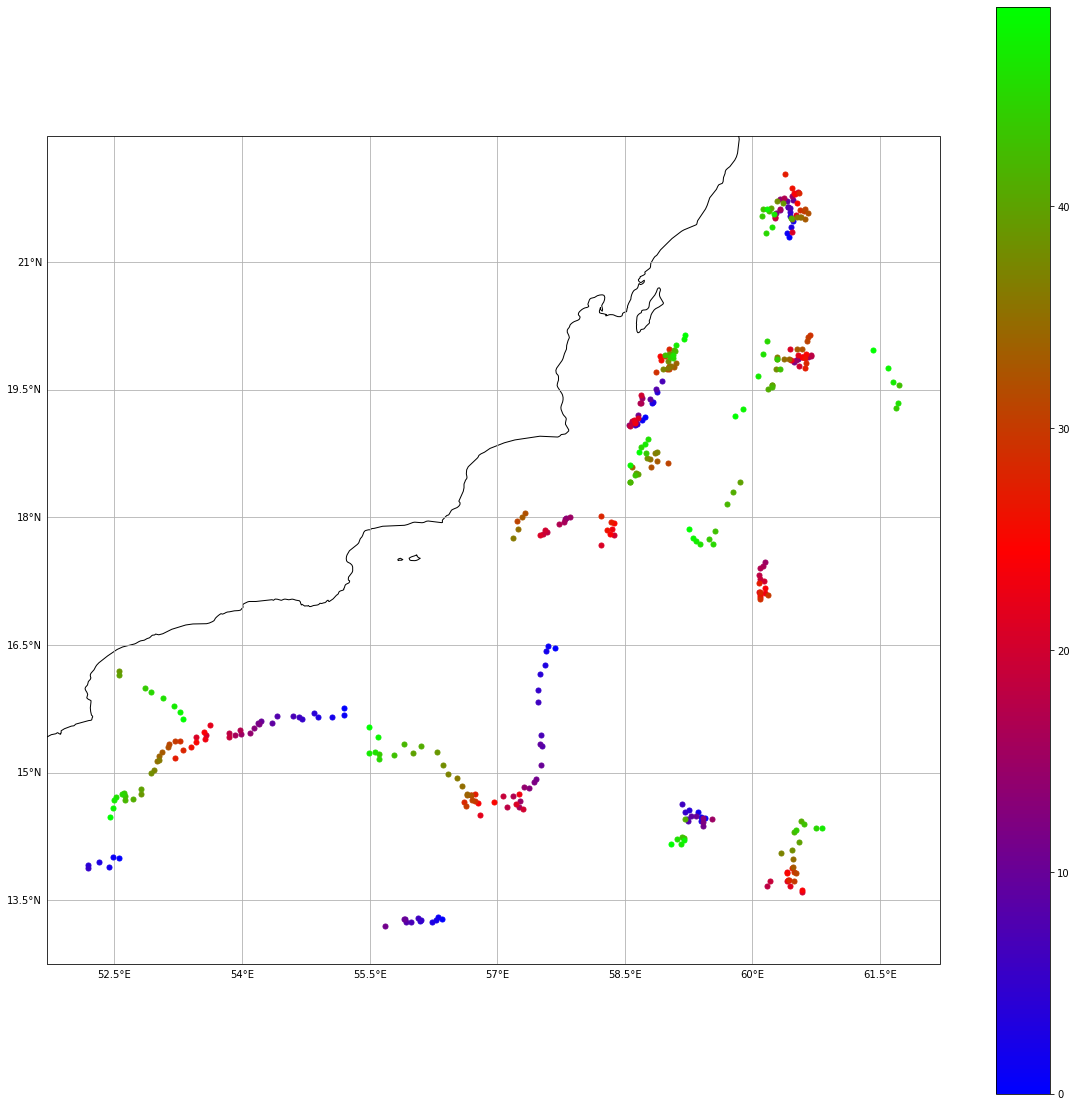

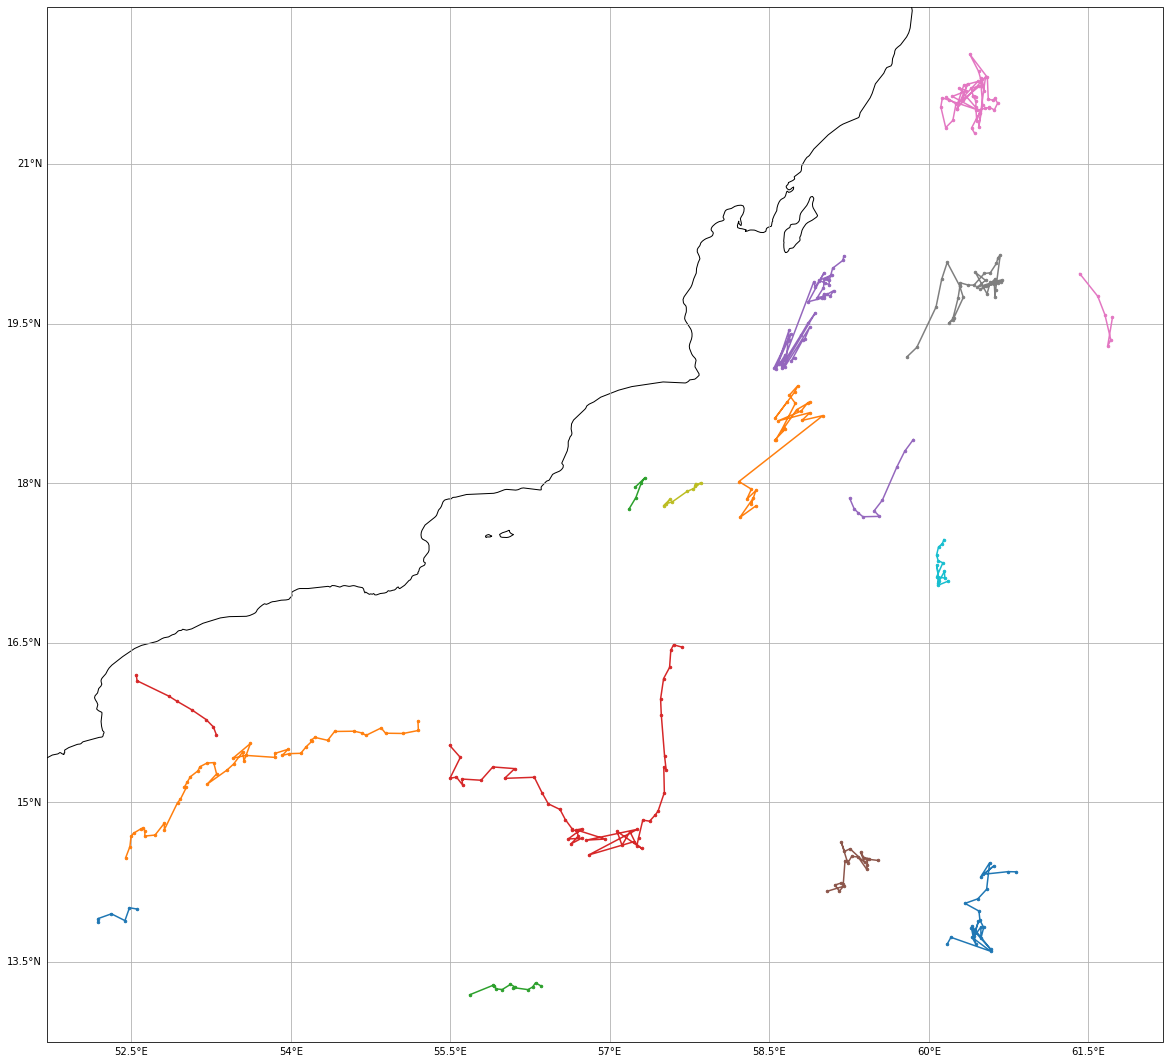

In [7]:
figure = StreamPlot()
figure.plot_catalogue(paths)
figure.show()

figure = StreamPlot()
figure.plot_eddies_trajectories(paths)
figure.show()

In [8]:
df = write_catalog(paths,fname='catalog.csv')

In [9]:
df

,date,id,center_x,center_y,a,b,angle,omega
0,0,0,52.553664,13.997529,0.434208,0.594040,3.099348,0.000005
1,0,1,55.196723,15.764543,1.003281,0.929626,0.418002,-0.000004
2,0,2,56.352735,13.274531,0.197636,0.260071,2.364348,0.000006
3,0,3,57.677146,16.461031,0.392220,0.918083,-3.014854,0.000004
4,0,4,58.741909,19.181603,0.133972,0.517823,2.615008,0.000006
...,...,...,...,...,...,...,...,...
376,49,16,58.666023,18.762472,0.267033,0.817902,2.479473,-0.000004
377,49,25,53.302284,15.633001,0.437073,0.151077,-0.565325,0.000006
378,49,29,59.255827,17.860327,0.592300,0.562805,0.482615,0.000005
379,49,31,59.045929,14.164710,0.122543,0.232239,2.431695,0.000004
